<a href="https://colab.research.google.com/github/guevaracodina/sf2_countdown_bulbs/blob/main/im2sf2bulbcountdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


```
# The im2sf2bulbcountdown function converts a binary image into an RGB
# image by replacing each pixel with predefined 16x16 pixel images based on
# specific surrounding pixel patterns, then saves and displays the
# resulting image.
#
# SYNTAX
# im2sf2bulbcountdown(ImIn)
#
# INPUTS
# ImIn: file name of the binary image (B/W) to be converted
#
# OUTPUTS
# RGB image composed of the bulbs of Street Fighter 2 countdown
#__________________________________________________________________________
# Copyright (C) 2024 Edgar Guevara, PhD
# CONAHCYT-Universidad Autónoma de San Luis Potosí
# Coordinación para la Innovación y Aplicación de la Ciencia y la Tecnología
#__________________________________________________________________________
```




In [7]:
import numpy as np
from PIL import Image
import os
from IPython.display import display

def im2sf2bulbcountdown(im_in):
    # Set the working directory
    working_dir = '/content/drive/MyDrive/Colab Notebooks/sf2bulbs'
    os.chdir(working_dir)

    # Read the input binary image
    bw = Image.open(im_in).convert('L')

    # Ensure the image is binary
    bw = np.array(bw)
    bw = (bw > 127).astype(np.uint8)

    rows, cols = bw.shape

    # Create a blank RGB image for the output
    im_out = np.zeros((rows * 16, cols * 16, 3), dtype=np.uint8)

    # Load the replacement images
    replacement_files = [
        'bulb_ON.png', 'bulb_OFF.png', 'bulb_OFF_D.png', 'bulb_OFF_DL.png',
        'bulb_OFF_DLR.png', 'bulb_OFF_DR.png', 'bulb_OFF_L.png', 'bulb_OFF_LR.png',
        'bulb_OFF_R.png', 'bulb_OFF_U.png', 'bulb_OFF_UD.png', 'bulb_OFF_UDL.png',
        'bulb_OFF_UDLR.png', 'bulb_OFF_UDR.png', 'bulb_OFF_UL.png', 'bulb_OFF_ULR.png',
        'bulb_OFF_UR.png'
    ]

    replacement_images = []
    for file in replacement_files:
        img = Image.open(file).convert('RGB')
        replacement_images.append(np.array(img))

    # Create a mapping for the conditions
    def get_tile(above, below, left, right):
        if not above and not below and not left and not right:
            return replacement_images[1]
        elif not above and below and not left and not right:
            return replacement_images[2]
        elif not above and below and left and not right:
            return replacement_images[3]
        elif not above and below and left and right:
            return replacement_images[4]
        elif not above and below and not left and right:
            return replacement_images[5]
        elif not above and not below and left and not right:
            return replacement_images[6]
        elif not above and not below and left and right:
            return replacement_images[7]
        elif not above and not below and not left and right:
            return replacement_images[8]
        elif above and not below and not left and not right:
            return replacement_images[9]
        elif above and below and not left and not right:
            return replacement_images[10]
        elif above and below and left and not right:
            return replacement_images[11]
        elif above and below and left and right:
            return replacement_images[12]
        elif above and below and not left and right:
            return replacement_images[13]
        elif above and not below and left and not right:
            return replacement_images[14]
        elif above and not below and left and right:
            return replacement_images[15]
        elif above and not below and not left and right:
            return replacement_images[16]
        else:
            return replacement_images[1]

    # Iterate through the binary image and replace each pixel
    for r in range(rows):
        for c in range(cols):
            if bw[r, c]:  # Process only if the pixel is ON (white pixel)
                tile = replacement_images[0]  # White pixels replaced by 'bulb_ON.png'
            else:
                above = r > 0 and bw[r - 1, c]
                below = r < rows - 1 and bw[r + 1, c]
                left = c > 0 and bw[r, c - 1]
                right = c < cols - 1 and bw[r, c + 1]
                tile = get_tile(above, below, left, right)
            im_out[r * 16:(r + 1) * 16, c * 16:(c + 1) * 16, :] = tile

    # Save the output image
    out_image = Image.fromarray(im_out)
    out_image.save(f'{os.path.splitext(im_in)[0]}_ImOut.png')

    # Display the output image in the Jupyter notebook
    display(out_image)


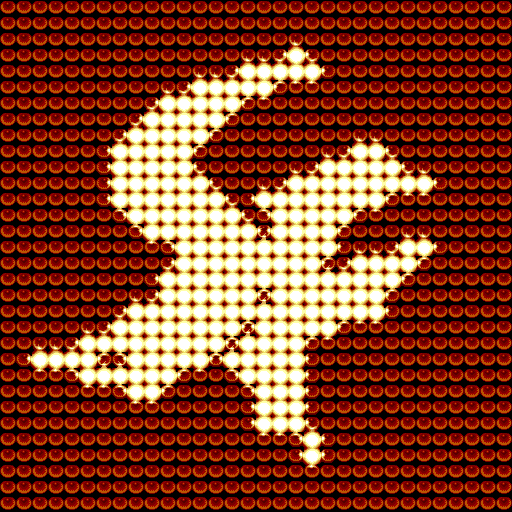

In [8]:
# Example usage
im2sf2bulbcountdown('SF_logo.png')